In [77]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plot_gp(mu, cov, X, X_train=None, Y_train=None, samples=[]):
    X = X.ravel()
    mu = mu.ravel()
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label=f'Sample {i+1}')
    if X_train is not None:
        plt.plot(X_train, Y_train, 'rx')
    plt.legend()

def plot_gp_2D(gx, gy, mu, X_train, Y_train, title, i):
    ax = plt.gcf().add_subplot(1, 2, i, projection='3d')
    ax.plot_surface(gx, gy, mu.reshape(gx.shape), cmap=cm.coolwarm, linewidth=0, alpha=0.2, antialiased=False)
    ax.scatter(X_train[:,0], X_train[:,1], Y_train, c=Y_train, cmap=cm.coolwarm)
    ax.set_title(title)

In [78]:
import numpy as np

def kernel(X1, X2, l=1.0, sigma_f=1.0):
    ''' Isotropic squared exponential kernel. Computes a covariance matrix from points in X1 and X2. Args: X1: Array of m points (m x d). X2: Array of n points (n x d). Returns: Covariance matrix (m x n). '''
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

In [79]:
%matplotlib inline


# Finite number of points
X = np.arange(-5, 5, 0.2).reshape(-1, 1)
# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)
samples



array([[ 1.78728073,  1.76183517,  1.65756002,  1.47164385,  1.21629942,
         0.9141586 ,  0.59057927,  0.26616773, -0.04714466, -0.34471889,
        -0.62338218, -0.87447048, -1.08000254, -1.21492794, -1.25512189,
        -1.18732485, -1.0157704 , -0.7620334 , -0.45862975, -0.1403845 ,
         0.16192185,  0.4237444 ,  0.62632961,  0.75655867,  0.80852026,
         0.78559442,  0.70050413,  0.57189962,  0.41850356,  0.25365207,
         0.08303366, -0.09318981, -0.2748477 , -0.45553934, -0.61921199,
        -0.74227362, -0.80153556, -0.78491375, -0.69941318, -0.57138706,
        -0.43771987, -0.33148596, -0.26880859, -0.24313566, -0.22934214,
        -0.1952521 , -0.11495436,  0.02186886,  0.20774869,  0.42177138],
       [-0.19561249, -0.19735754, -0.16522752, -0.10089498, -0.01348471,
         0.08889406,  0.20591534,  0.34379573,  0.50517273,  0.67640734,
         0.8219769 ,  0.89218994,  0.84237585,  0.65446799,  0.35011159,
        -0.01128806, -0.34899466, -0.58532884, -0.

In [80]:
cov

array([[1.00000000e+00, 9.80198673e-01, 9.23116346e-01, ...,
        6.49934797e-20, 9.72098502e-21, 1.39694394e-21],
       [9.80198673e-01, 1.00000000e+00, 9.80198673e-01, ...,
        4.17501006e-19, 6.49934797e-20, 9.72098502e-21],
       [9.23116346e-01, 9.80198673e-01, 1.00000000e+00, ...,
        2.57675711e-18, 4.17501006e-19, 6.49934797e-20],
       ...,
       [6.49934797e-20, 4.17501006e-19, 2.57675711e-18, ...,
        1.00000000e+00, 9.80198673e-01, 9.23116346e-01],
       [9.72098502e-21, 6.49934797e-20, 4.17501006e-19, ...,
        9.80198673e-01, 1.00000000e+00, 9.80198673e-01],
       [1.39694394e-21, 9.72098502e-21, 6.49934797e-20, ...,
        9.23116346e-01, 9.80198673e-01, 1.00000000e+00]])

用$\operatorname{cov}(X, Y)=\frac{\sum_{i=1}^{n}\left(X_{i}-\overline{X}\right)\left(Y_{i}-\overline{Y}\right)}{n-1}$计算协方差.XY分别代表采样的位置。n=3，因为采样三次。
这个矩阵和前面生成的cov对应

In [81]:
np.cov(samples.T)

array([[ 2.29156127,  2.14828646,  1.9302619 , ..., -0.79839043,
        -0.65582718, -0.45438563],
       [ 2.14828646,  2.01837166,  1.81627244, ..., -0.69260125,
        -0.56456799, -0.38554702],
       [ 1.9302619 ,  1.81627244,  1.63611189, ..., -0.58752669,
        -0.47598393, -0.3212487 ],
       ...,
       [-0.79839043, -0.69260125, -0.58752669, ...,  0.98729318,
         0.86633747,  0.67144275],
       [-0.65582718, -0.56456799, -0.47598393, ...,  0.86633747,
         0.76141704,  0.59159122],
       [-0.45438563, -0.38554702, -0.3212487 , ...,  0.67144275,
         0.59159122,  0.46140573]])

In [82]:


'''X=np.arange(0,1,0.2).reshape(-1,1)
mu = np.zeros(X.shape)
cov = kernel(X, X)
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)%五维向量，也就是五个sample的位置，每个维度取三次样
samples
'''

'X=np.arange(0,1,0.2).reshape(-1,1)\nmu = np.zeros(X.shape)\ncov = kernel(X, X)\nsamples = np.random.multivariate_normal(mu.ravel(), cov, 3)%五维向量，也就是五个sample的位置，每个维度取三次样\nsamples\n'

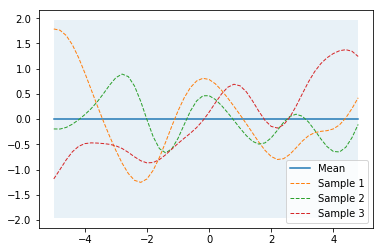

In [83]:
plot_gp(mu, cov, X, samples=samples)

$\left( \begin{array}{c}{\mathbf{y}} \\ {\mathbf{f}_{*}}\end{array}\right) \sim \mathcal{N}\left(\mathbf{0}, \left( \begin{array}{cc}{\mathbf{K}_{y}} & {\mathbf{K}_{*}} \\ {\mathbf{K}_{*}^{T}} & {\mathbf{K}_{* *}}\end{array}\right)\right)$

$\mathbf{K}_{y}=\kappa(\mathbf{X}, \mathbf{X})+\sigma_{y}^{2} \mathbf{I}=\mathbf{K}+\sigma_{y}^{2} \mathbf{I}$

$\mathbf{K}_{*}=\kappa\left(\mathbf{X}, \mathbf{X}_{*}\right)$

$\mathbf{K}_{* *}=\kappa\left(\mathbf{X}_{*}, \mathbf{X}_{*}\right)$

$\begin{aligned} \boldsymbol{\mu}_{*} &=\mathbf{K}_{*}^{T} \mathbf{K}_{y}^{-1} \mathbf{y} \\ \mathbf{\Sigma}_{*} &=\mathbf{K}_{* *}-\mathbf{K}_{*}^{T} \mathbf{K}_{y}^{-1} \mathbf{K}_{*} \end{aligned}$

In [84]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    ''' Computes the suffifient statistics of the GP posterior predictive distribution from m training data X_train and Y_train and n new inputs X_s. Args: X_s: New input locations (n x d). X_train: Training locations (m x d). Y_train: Training targets (m x 1). l: Kernel length parameter. sigma_f: Kernel vertical variation parameter. sigma_y: Noise parameter. Returns: Posterior mean vector (n x d) and covariance matrix (n x n). '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

设置training data。也就是选取其中某几个点，并得到其observation。
通过$X, X_{train}, Y_{train}$得到$K,K_\ast,K_{\ast\ast},K^T$。随后得到$\mu_\ast$和$cov_\ast$

$\mu_\ast$是训练之后的平均值，并以这个平均值，再进行采样

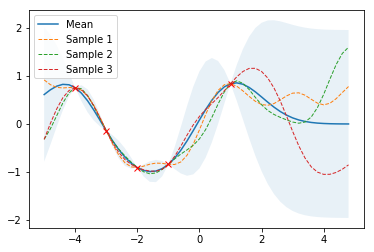

In [85]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)